In [31]:
import pandas as pd
import seaborn as sns

In [17]:
df = pd.read_csv('cod.csv')

In [18]:
df.head()

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.00000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1,JohniceRex#9176033,0,0,0.00000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16
2,bootybootykill#1892064,0,66,1.03125,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64
3,JNaCo#5244172,3,2,0.40000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5
4,gomezyayo_007#6596687,0,2,0.20000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10


In [19]:
df.shape
# Appropriately sized dataset, a 70-30 split between train and test should be feasible.

(1558, 19)

In [20]:
df.isnull().sum()
# Checking for null values in the dataset, none found.

name              0
wins              0
kills             0
kdRatio           0
killstreak        0
level             0
losses            0
prestige          0
hits              0
timePlayed        0
headshots         0
averageTime       0
gamesPlayed       0
assists           0
misses            0
xp                0
scorePerMinute    0
shots             0
deaths            0
dtype: int64

In [21]:
df.isna().sum()
# Checking for NaN values, none found. This does not mean the dataset needs no cleaning.

name              0
wins              0
kills             0
kdRatio           0
killstreak        0
level             0
losses            0
prestige          0
hits              0
timePlayed        0
headshots         0
averageTime       0
gamesPlayed       0
assists           0
misses            0
xp                0
scorePerMinute    0
shots             0
deaths            0
dtype: int64

In [22]:
df.corr()
# Most of the correlation between the variables is justified, for example the correlation between gamesPlayed and wins is high. Understandably, the more games are played, the more games can be won.
# No 100% correlation between variables, therefore no variable needs removal.

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
wins,1.000000,0.900201,0.386612,0.496721,0.845055,0.632532,0.392511,0.853138,0.934991,0.867875,-0.071429,0.931809,0.842728,0.879621,0.829105,0.340977,0.878899,0.912530
kills,0.900201,1.000000,0.406106,0.504433,0.875606,0.623952,0.371014,0.956512,0.881143,0.976575,-0.073888,0.920272,0.958100,0.947597,0.875062,0.353855,0.953966,0.983574
kdRatio,0.386612,0.406106,1.000000,0.504753,0.513195,0.512484,0.389929,0.380265,0.413756,0.419661,0.072248,0.361056,0.367282,0.369224,0.426856,0.451102,0.373149,0.373437
killstreak,0.496721,0.504433,0.504753,1.000000,0.534950,0.569522,0.294850,0.482832,0.486061,0.513845,-0.092810,0.472495,0.469738,0.477543,0.458867,0.451865,0.480904,0.490072
level,0.845055,0.875606,0.513195,0.534950,1.000000,0.665629,0.512850,0.797220,0.938933,0.880610,0.059675,0.774408,0.817353,0.803272,0.969955,0.263510,0.806073,0.861555
losses,0.632532,0.623952,0.512484,0.569522,0.665629,1.000000,0.358865,0.599764,0.634742,0.627122,-0.076287,0.657998,0.603573,0.600885,0.588177,0.493834,0.603631,0.621198
prestige,0.392511,0.371014,0.389929,0.294850,0.512850,0.358865,1.000000,0.327667,0.473250,0.374914,0.207348,0.336447,0.344325,0.336664,0.442993,0.013098,0.336605,0.376481
hits,0.853138,0.956512,0.380265,0.482832,0.797220,0.599764,0.327667,1.000000,0.812103,0.937531,-0.097044,0.900000,0.973379,0.968216,0.789628,0.381123,0.979051,0.945092
timePlayed,0.934991,0.881143,0.413756,0.486061,0.938933,0.634742,0.473250,0.812103,1.000000,0.865555,0.029985,0.869010,0.821605,0.836810,0.932366,0.245996,0.836215,0.889276
headshots,0.867875,0.976575,0.419661,0.513845,0.880610,0.627122,0.374914,0.937531,0.865555,1.000000,-0.068719,0.878931,0.938885,0.915486,0.876730,0.343639,0.924202,0.955821


In [23]:
def positive_kd(n):
    if n < 1:
        return 0
    else:
        return 1
    
df['Positive_KD'] = df.iloc[:, 3].apply(positive_kd)
df.head(30)
# Creating a new variable called Positive_KD
# K/D ratio is the most prominent success indicator in shooter games. Having a positive k/d means the player is at least moderately successful at the game.
# On the other hand, having a negative k/d means the player's engagements with other players end unfavourable for the player in most cases.
# The values could have been set to 'Positive' - 'Negative', or 'True' - 'False', but in case the variable is used for ML, '0' - '1' works better.

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,Positive_KD
0,RggRt45#4697369,0,0,0.000000,0,1,0,0,0,0,0,0.000000,0,0,0,0,0.000000,0,0,0
1,JohniceRex#9176033,0,0,0.000000,0,1,0,110,0,7,0,7.000000,0,0,0,700,0.000000,0,16,0
2,bootybootykill#1892064,0,66,1.031250,0,9,0,110,0,32,16,32.000000,0,1,0,48300,0.000000,0,64,1
3,JNaCo#5244172,3,2,0.400000,0,1,0,0,0,3,0,3.000000,0,0,0,1150,0.000000,0,5,0
4,gomezyayo_007#6596687,0,2,0.200000,0,1,0,110,0,5,1,5.000000,0,0,0,1000,0.000000,0,10,0
5,Brxndoon7-LK#4002715,684,27011,1.066743,18,177,10,110,98332,1366,5113,2.323129,588,6063,305319,3932335,255.672035,403651,25321,1
6,bdooory_ab#7095171,4,162,0.632812,4,6,2,0,568,8,35,2.000000,4,68,4836,24485,265.500000,5404,256,0
7,ahevepluto#3505304,186,1898,0.569628,13,37,7,2,5111,550,485,3.666667,150,488,39978,458269,180.379636,45089,3332,0
8,MilkyLemonz-_-#5981249,741,21803,1.036658,26,185,29,111,81361,2442,3894,2.826389,864,4029,327230,4269370,198.844226,408591,21032,1
9,RPDUNKduo#8122914,26,349,0.444020,7,12,4,0,996,44,40,2.933333,15,138,4844,72765,253.677273,5840,786,0


In [24]:
df.Positive_KD.value_counts()
# More players are unsuccessful than successful.

0    1264
1     294
Name: Positive_KD, dtype: int64

In [25]:
num_true_cases = len(df[df.Positive_KD == 1])
num_false_cases = len(df[df.Positive_KD == 0])
print('Number of players with positive k/d:',num_true_cases,'-', np.round(num_true_cases / df.shape[0] * 100,2),'%')
print('Number of players with negative k/d:', num_false_cases,'-',np.round(num_false_cases / df.shape[0] * 100,2),'%')
# Exact split between positive and negative k/d players.

Number of players with positive k/d: 294 - 18.87 %
Number of players with negative k/d: 1264 - 81.13 %


In [26]:
# to find out the hidden missing values
print('name has', len(df[df.name == 0]), 'Zero values')
print('wins has', len(df[df.wins == 0]), 'Zero values')
print('kills has', len(df[df.kills == 0]), 'Zero values')
print('kdRatio has', len(df[df.kdRatio == 0]), 'Zero values')
print('killstreak has', len(df[df.killstreak == 0]), 'Zero values')
print('level has', len(df[df.level == 0]), 'Zero values')
print('losses has', len(df[df.losses == 0]), 'Zero values')
print('prestige has', len(df[df.prestige == 0]), 'Zero values')
print('hits has', len(df[df.hits == 0]), 'Zero values')
print('timePlayed has', len(df[df.timePlayed == 0]), 'Zero values')
print('headshots has', len(df[df.headshots == 0]), 'Zero values')
print('averageTime has', len(df[df.averageTime == 0]), 'Zero values')
print('gamesPlayed has', len(df[df.gamesPlayed == 0]), 'Zero values')
print('assists has', len(df[df.assists == 0]), 'Zero values')
print('misses has', len(df[df.misses == 0]), 'Zero values')
print('xp has', len(df[df.xp == 0]), 'Zero values')
print('scorePerMinute has', len(df[df.scorePerMinute == 0]), 'Zero values')
print('shots has', len(df[df.shots == 0]), 'Zero values')
print('deaths has', len(df[df.deaths == 0]), 'Zero values')
print('Positive_KD has', len(df[df.Positive_KD == 0]), 'Zero values')
# All these 0 values can be justified, no cleaning is required yet.

name has 0 Zero values
wins has 529 Zero values
kills has 276 Zero values
kdRatio has 276 Zero values
killstreak has 615 Zero values
level has 0 Zero values
losses has 583 Zero values
prestige has 609 Zero values
hits has 611 Zero values
timePlayed has 210 Zero values
headshots has 383 Zero values
averageTime has 210 Zero values
gamesPlayed has 656 Zero values
assists has 483 Zero values
misses has 601 Zero values
xp has 224 Zero values
scorePerMinute has 597 Zero values
shots has 600 Zero values
deaths has 212 Zero values
Positive_KD has 1264 Zero values


In [27]:
df = df.drop(['name'], axis = 1)
# Dropping the name variable as it is not needed, leaving the data set with only numerical and a single categorical variable

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wins            1558 non-null   int64  
 1   kills           1558 non-null   int64  
 2   kdRatio         1558 non-null   float64
 3   killstreak      1558 non-null   int64  
 4   level           1558 non-null   int64  
 5   losses          1558 non-null   int64  
 6   prestige        1558 non-null   int64  
 7   hits            1558 non-null   int64  
 8   timePlayed      1558 non-null   int64  
 9   headshots       1558 non-null   int64  
 10  averageTime     1558 non-null   float64
 11  gamesPlayed     1558 non-null   int64  
 12  assists         1558 non-null   int64  
 13  misses          1558 non-null   int64  
 14  xp              1558 non-null   int64  
 15  scorePerMinute  1558 non-null   float64
 16  shots           1558 non-null   int64  
 17  deaths          1558 non-null   i

<AxesSubplot:xlabel='wins', ylabel='timePlayed'>

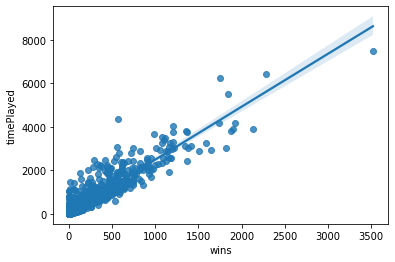

In [32]:
sns.regplot(x='wins', y='timePlayed', data=df)
# The more time spent playing the game, the more wins the player has. Call of Duty is a team based game, therefore it is true to less successful players as well.

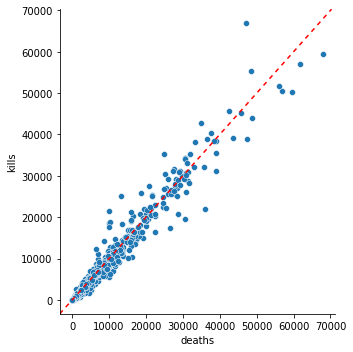

In [40]:
scat = sns.relplot(data=df, x='deaths', y='kills')
scat.ax.axline(xy1 = (20,10), slope = 1, color ='r',dashes =(3,3))
# This basically means every blue dot(player) is successful to the left of the dashed line